# Lab 2: Classification (Part 1)

## Name: Abhay Narayanan (abhayn2)

### Due September 8, 2023 11:59 pm

#### Logistics

See Canvas.

<b>Lab submission:</b> 

 There will be two submissions.  Submit your code to gradescope LAB2 CODE section and submit the pdf version of the outputs (the pdf of the Jupyter notebook) to the LAB2 PDF section.

#### What You Will Need To Know For This Lab

This lab covers some basic classifiers which can be used for M-ary classification.

- k-Nearest Neighbors
- Bayes Classifiers
- Linear Discriminant Analysis

There are some problems which have short answer questions. <b>Do not write an essay -- a few sentences will suffice.</b>

<b>Be clear about your answers.</b> For example, if a question asks you "Which classifier would you choose?", be unequivocal about which classifier you would choose (and why); as engineers, part of your job is to make design decisions and justify them in comparison to the alternatives. 

#### Preamble (Don't change this)

In [17]:
from __future__ import division
%pylab inline
import numpy as np
import scipy.spatial.distance as dist
from scipy import stats

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


#### Problem 1 : Bayes Classifiers (20 points)

In this section, you will implement a Bayes classifier for the following $M$-ary classification problem:

$$H_y: \mathbf{X} \sim \mathcal{N}(\mathbf{\mu}_y,\Sigma) \qquad y=0,\ldots,M-1$$

i.e. the data is a $d$-dimensional Gaussian with a common covariance matrix among all classes, but the means are different (and there is a prior among the classes). Remember, when the mean vectors, covariance matrix and prior probabilities are known, no classifier can do better than the Bayes classifier.

You will write a function which takes in 4 parameters:
* A set of data to classify (with rows as feature vectors) as a $(V,d)$ numpy.ndarray (data)
* A M-length vector with the prior probabilities of each class as a numpy.ndarray (pi)
* A matrix with rows giving the class means as a $(M,d)$ numpy.ndarray (means)
* The common covariance matrix as a $(d,d)$ numpy.ndarray (cov)

It will output a length $V$ numpy.ndarray of the outputs of the classifier (labels). You may not use scikit-learn or similar to implement this. Note that the class labels in this problem are $0,1,2$ (not $1,2,3$). Since Python uses zero-based indexing, this will allow you to avoid a few +1's in your code. 

Some hints which will help you write your code compactly:
* Using some (or all) of the hints, you should be able to write the Bayes classifier by using operations on numpy arrays, rather than loops. This is known as vectorization or array programming, and it can improve both speed and readibility of code. For example, a reasonably vectorized implementation can be done in under 5 lines.  If you cannot figure this out, write your code using loops appropriately (Don't spend too much time on trying to write this without loops -- 20 minutes tops!)
* $\mathbf{x}^\top A \mathbf{y} = \mathbf{y}^\top A^\top \mathbf{x}$ for a matrix $A$ and vectors $\mathbf{x},\mathbf{y}$ of appropriate size.
* Covariance matrices are symmetric -- $\Sigma = \Sigma^\top$
* If $A = \begin{bmatrix} \mathbf{a}_1^\top \\ \vdots \\ \mathbf{a}_N^\top \end{bmatrix}$ has $k$ columns and $\mathbf{v}$ is a vector of length $k$, then $A \mathbf{v} = \begin{bmatrix} \mathbf{a}_1^\top \mathbf{v} \\ \vdots \\ \mathbf{a}_N^\top \mathbf{v} \end{bmatrix}$.
* Some useful functions that you did not see in Lab 1 (*read the documentation before using them!*): numpy.sum, numpy.log, numpy.argmax.
* You may use <a href="http://docs.scipy.org/doc/numpy-1.10.1/user/basics.broadcasting.html">broadcasting</a> to help simplify your code.


A function prototype is provided below <b>(10 points)</b>:

In [18]:
import math
def bayesClassifier(data,pi,means,cov):
#Put your code here
    
    x = (np.log(pi) - 0.5 * ((np.dot(means, np.linalg.inv(cov))) * means).sum(1))[:, np.newaxis] + np.dot(means @ np.linalg.inv(cov), data.T)           
    
    return np.argmax(x, axis=0)                       
    

Now, you will write a function which calculates the error of a classifier using the $0,1$-loss by comparing the true labels and the predicted labels. 

The function will take in two parameters:
* A N-vector with the true labels as a numpy.ndarray (truelabels)
* A N-vector with the estimated labels as a numpy.ndarray (estimatedlabels)

The function will return the error (a scalar).

A function prototype is provided below <b>(5 points)</b>:

In [19]:
def classifierError(truelabels,estimatedlabels):
    # Put your code here
    y = truelabels - estimatedlabels
    loss_tot = 0
    for i in range(len(y)):
        if y[i] == 0:
            loss_tot = loss_tot
        else:
            loss_tot = 1+loss_tot
    
    return (loss_tot/ estimatedlabels.size)

Now, we will load some sample data, in the format specified above. 
We have three classes, with
$$\pi_0=\frac{1}{3}, \pi_1=\frac{1}{2}, \pi_2=\frac{1}{6}$$

$$\mathbf{\mu}_0=\begin{bmatrix} 5 \\ 5\end{bmatrix},\mathbf{\mu}_1=\begin{bmatrix} 5 \\ 0\end{bmatrix}, \mathbf{\mu}_2=\begin{bmatrix} -1\\0\end{bmatrix} $$

$$\Sigma=\begin{bmatrix} 3 & 1 \\ 1 & 3 \end{bmatrix}$$


In [20]:
# Loading the data
from numpy import genfromtxt
problem1_tmp= genfromtxt('val.csv', delimiter=',')

#The data which you will use to test the classifier is called "data"
data=problem1_tmp[:,:2]
#The labels are in "truelabels"
truelabels=problem1_tmp[:,2]


Let's visualize the data by class. Each class will be in a different color.

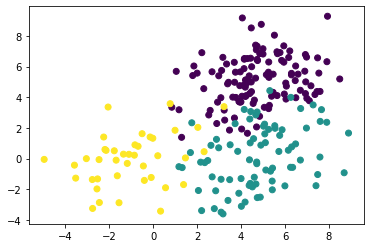

In [21]:
scatter(data[:,0],data[:,1],c=truelabels)

Run the classifier and report the classifier's error rate. <b>(5 points)</b>

In [40]:
# Put your code here. Store your estimated labels in a variable called "estimatedlabels".
pi = np.array([1/3, 1/2, 1/6])
means = np.array([[5, 5], [5, 0], [-1, 0]])
cov = np.array([[3, 1], [1, 3]])

estimatedlabels = bayesClassifier(data, pi, means, cov)
Error_Rate = classifierError(truelabels, estimatedlabels)
print("The Error Rate is", Error_Rate)

The Error Rate is 0.08333333333333333


The classifier's error rate is **0.08333333333333333**

Now, let's see which points were assigned to the correct class (blue) and those which are wrong (red). 

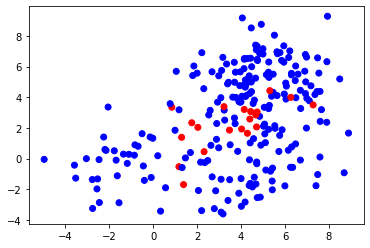

In [26]:
cmap=['b','r']
colors = np.asarray(cmap)[np.asarray(truelabels!=estimatedlabels).astype(int)]
scatter(data[:,0],data[:,1],c=colors) 

And the points which were misclassified (based on which decision boundary they crossed: cmap[i][j] denotes the color for crossing the decision boundary between class i and class j). Note that the decision boundaries in this case are linear, since we have Gaussians with common covariance matrix as our classes.

/var/folders/np/4ztwczcs2t13gfpvxkqzg36h0000gn/T/ipykernel_41236/521165334.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  colors = np.asarray(cmap)[truelabels.astype(np.int), estimatedlabels.astype(int)]


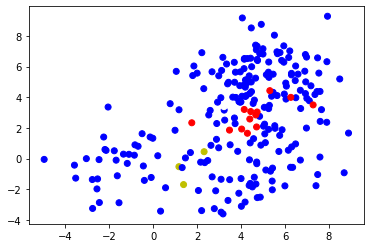

In [27]:
cmap=[['b','r','w'],['r','b','y'],['w','y','b']]
colors = np.asarray(cmap)[truelabels.astype(np.int), estimatedlabels.astype(int)]
scatter(data[:,0],data[:,1],c=colors)

And the types of errors made (blue points are correct; cmap[i][j] is the color corresponding to declaring class j when i was the true class):

/var/folders/np/4ztwczcs2t13gfpvxkqzg36h0000gn/T/ipykernel_41236/1385744098.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  colors = np.asarray(cmap)[truelabels.astype(np.int), estimatedlabels.astype(int)]


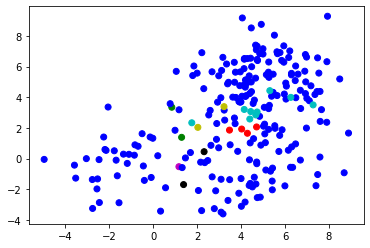

In [28]:
cmap=[['b','r','g'],['c','b','m'],['y','k','b']]
colors = np.asarray(cmap)[truelabels.astype(np.int), estimatedlabels.astype(int)]
scatter(data[:,0],data[:,1],c=colors)

Note that depending on the application, you may need to weigh different types of errors differently (e.g. is it better to convict an innocent man, or let a guilty man go free?). So, it may be worthwhile to visualize the errors made by a classifier separately. 

You may want to (but are not required to) read about <a href="https://en.wikipedia.org/wiki/Type_I_and_type_II_errors#Example_3">Type I and Type II errors</a> (false alarms and misses, in ECE313 parlance) and <a href="https://en.wikipedia.org/wiki/Precision_and_recall">Precision and Recall</a> for some examples/details.

#### Problem 2 : Linear Discriminant Analysis (20 points)

In this problem, you will implement Linear Discriminant Analysis (LDA). You will use the Bayes classifier from Problem 1 to do this. You will be given:
* Training data feature vectors as a $(N,d)$ numpy.ndarray (trainfeat), where each row is a feature vector.
* Training data labels as a length $N$ numpy.ndarray (trainlabel)

The first function you will write will return a tuple of the estimates of the prior probabilities (as a $M$ length numpy.ndarray), means (as a $(M,d)$ numpy.ndarray) and covariance matrix (as a $(d,d)$ numpy.ndarray) in the LDA model. You may assume that labels $0,\ldots,$trainlabel.max() exist in order to avoid some error checking. <b>(10 points)</b>

In [29]:
def trainLDA(trainfeat,trainlabel):
    nlabels=int(trainlabel.max())+1 #Assuming all labels up to nlabels exist.
    pi=np.zeros(nlabels)
    means=np.zeros((nlabels,trainfeat.shape[1]))
    cov=np.zeros((trainfeat.shape[1],trainfeat.shape[1]))
    # Put your code here
    for i in range(len(pi)):

        pi[i] = trainlabel[trainlabel == i].size/trainlabel.size
        
        for j in range(trainlabel.size):
            if (trainlabel[j] == i):
                for k in range(trainfeat.shape[1]):
                    means[i, k] = means[i, k] + trainfeat[j, k]
        means[i, :] = means[i, :] / (trainlabel[trainlabel == i].size)
        
        np.reshape(means[i], (trainfeat.shape[1], 1))
        for b in range(trainlabel.size):
            if (trainlabel[b] == i):
                val = np.outer(trainfeat[b] - means[i], trainfeat[b] - means[i])
                cov = cov + val
    cov = cov/(trainlabel.size - nlabels)
    
    return (pi,means,cov)
        
    

Now, we will load some data to validate our model.

In [30]:
# Loading the data
traindata_tmp= genfromtxt('train.csv', delimiter=',')
valdata_tmp= genfromtxt('val.csv', delimiter=',')

#The data which you will use to train LDA is called "trainingdata"
trainingdata=traindata_tmp[:,:2]
#The corresponding labels are in "traininglabels"
traininglabels=traindata_tmp[:,2]

#The data which you will use to validate LDA is called "valdata"
valdata=valdata_tmp[:,:2]
#The corresponding labels are in "vallabels"
vallabels=valdata_tmp[:,2]

And we can visualize the training data:

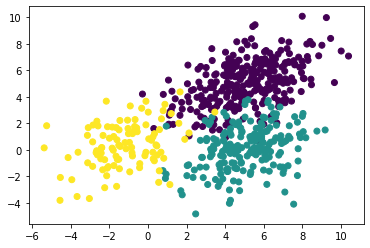

In [31]:
scatter(trainingdata[:,0],trainingdata[:,1],c=traininglabels)

Use the bayesClassifier function you wrote in Problem 1 along with the trainLDA function from Problem 2 to implement the LDA classifier. Train the classifier on the training data, and then run the classifier on the training data and the validation data. Calculate the corresponding errors. Make sure to display the prior, means and covariance estimated in LDA. <b>(5 points)</b>

In [32]:
# Put your code here
par_est = trainLDA(trainingdata, traininglabels)
par_true = trainLDA(valdata, vallabels)

pi_ = par_est[0]
means_ = par_est[1]
cov_ = par_est[2]

pi__ = par_true[0]
means__ = par_true[1]
cov__ = par_true[2]

estimatedtraininglabels = bayesClassifier(trainingdata, pi_, means_, cov_)
estimatedvallabels = bayesClassifier(valdata, pi__, means__, cov__)


error_train = classifierError(traininglabels, estimatedtraininglabels)
error_validation = classifierError(truelabels, estimatedvallabels)

print("The Training Error is", error_train)
print("The Validation Error is", error_validation)

The Training Error is 0.07166666666666667
The Validation Error is 0.09583333333333334


We can also visualize the performance of the classifier on the validation data (blue=correct, red=error).

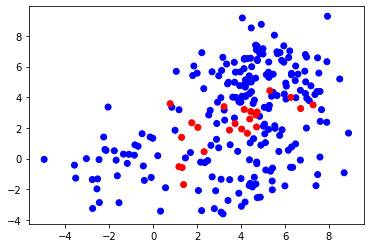

In [33]:
#assuming your labels predicted on the validation data are in estimatedvallabels (change this appropriately if they aren't)
cmap=['b','r']
colors = np.asarray(cmap)[np.asarray(vallabels!=estimatedvallabels).astype(int)]
scatter(data[:,0],data[:,1],c=colors) 

Comment on the training error (error of the classifier on the training data) and the validation error (error of the classifier on the validation data). Which one is higher? Does this make sense? <b>(5 points)</b>

The Training Error is slightly lower than the Validation Error. This makes sense because the error would naturally be lower when a classifier is tested on the same dataset it was trained on. As such, it is clear that the Validation Error (obtained from a different dataset) would result in an error that is at least as high as the Training Error. 

#### Problem 3: k-Nearest Neighbors (20 points)

Implement the k-Nearest Neighbors algorithm.

Your function will take:
* Training data feature vectors as a $(N,d)$ numpy.ndarray (trainfeat), where each row is a feature vector
* Training data labels as a length $N$ numpy.ndarray (trainlabel)
* Test data feature vectors as a $(V,d)$ numpy.ndarray (testfeat), where each row is a feature vector
* The value of k

Use the Euclidean distance (scipy.spatial.distance.cdist) as your dissimilarity measure. 

Your function should return a length $V$ numpy.ndarray vector of the estimated labels. This should take around 4 lines of code. Do not use the kNN implementation in scikit-learn or similar.

Some functions which may be useful (read the documentation):
* The numpy.argpartition function can be used to find the $k$ smallest elements of an array (via slicing)
* scipy.stats.mode can find the most common element in an array. 

<b>(10 points)</b>

In [34]:
import scipy.spatial.distance as dist
from scipy import stats
def kNN(trainfeat,trainlabel,testfeat, k):
    #Put your code here
    x = testfeat.shape[0]
    estimatedlabels = np.zeros(x)
    
    bruh = trainlabel[np.argpartition(dist.cdist(testfeat,trainfeat,'euclidean'),k)]
    estimatedlabels = stats.mode(bruh[:,:k],axis = 1)[0]
    
    return estimatedlabels.reshape(x)

Run your k-Nearest Neighbors classifier with the training data from Problem 2, for $k=1,3,4,5$. Compute the training and validation error rates on the data from Problem 2. <b>(5 points)</b>

In [35]:
# Put your code here
est_labels_1 = kNN(trainingdata, traininglabels, valdata, 1)
est_labels_3 = kNN(trainingdata, traininglabels, valdata, 3)
est_labels_4 = kNN(trainingdata, traininglabels, valdata, 4)
est_labels_5 = kNN(trainingdata, traininglabels, valdata, 5)


error_k_1 = classifierError(vallabels, est_labels_1)
error_k_3 = classifierError(vallabels, est_labels_3)
error_k_4 = classifierError(vallabels, est_labels_4)
error_k_5 = classifierError(vallabels, est_labels_5)

print("Error for k=1:", error_k_1)
print("Error for k=3:", error_k_3)
print("Error for k=4:", error_k_4)
print("Error for k=5:", error_k_5)

Error for k=1: 0.11666666666666667
Error for k=3: 0.10833333333333334
Error for k=4: 0.10833333333333334
Error for k=5: 0.1


I will now tell you that the data set was generated according to the parameters given in the final part of problem 1. Compare and contrast the results you got from LDA and k-Nearest Neighbors as well as the Bayes classifier from problem 1. Your answer should consider both computational resources as well as error performance. What is special about the training error when you only have the standard nearest neighbor algorithm? Out of LDA and k-NN, which classifier would you prefer in this problem? Why? <b>(5 points)</b>

Bayes had the lower classifier error than k-nearest neighbors up to k = 5. The Bayes Value was in between the Training and validation error of the LDA, however. In any case though, it makes sense to compare the validation error of LDA with the Bayes value, which still means Bayes was the best classifier. The kNN algorithm is undoubtedly the most computationally expensive due to its nature, with the Bayes Classifier being very efficient, especially when parameters are known. LDA requires their computation first. 

The Training Error would perhaps be zero for the kNN algorithm for k = 1 as it would simply search for the closest neighbour, which would explain why it would always choose the correct class for each point.

#### Problem 4: LDA and kNN, again <b>(20 points)</b>

In many cases, you will be using other people's libraries to implement learning algorithms. In this problem, you will become familiar with scikit-learn's implementation of LDA and kNN.

First, we will load a data set of digits drawn from zip codes written on US mail. This data set was designed to help get good algorithms to sort mail by zip code automatically. It has been preprocessed a bit, with details given <a href="http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/zip.info.txt">here</a>. Each feature vector consists of $16^2$ real values representing grayscale values of a 16 by 16 image of a digit. The training data has 7291 samples, while the validation data has 2007 samples. Note that this is not the same dataset built into scikit-learn -- it is much larger. 

In [36]:
#Loading the Data

#Read in the Training Data
traindata_tmp= genfromtxt('zip.train', delimiter=' ') 

#The training labels are stored in "trainlabels", training features in "traindata". Rows are feature vectors.
trainlabels=traindata_tmp[:,0]
traindata=traindata_tmp[:,1:]

#Read in the Validation Data
valdata_tmp= genfromtxt('zip.val', delimiter=' ') 

#The validation labels are stored in "vallabels", validation features in "valdata". Rows are feature vectors.
vallabels=valdata_tmp[:,0]
valdata=valdata_tmp[:,1:]

Use scikit-learn's sklearn.neighbors.KNeighborsClassifier to run a Nearest Neighbor classifier (1-NN) on the validation data with the provided training set. Note that KNeighborsClassifier defaults to 5-NN. 

Measure the time for fitting the model and classification (the %timeit feature or time() or similar will be useful). Try the different algorithms possible to fit the model (ball tree, kd-tree and brute force, and specify the fastest one in your code).  Make sure to calculate the error on the validation set. <b>(5 points)</b>

In [37]:
# Insert code here
from sklearn import neighbors
#From the output of this cell, the fastest is 'brute'
import time
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, 
# leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=None, **kwargs)


a = time.time()
x = neighbors.KNeighborsClassifier(algorithm = 'ball_tree')
x.fit(traindata, trainlabels)
b = time.time()

ball_error = classifierError(vallabels, x.predict(valdata))

print("Error from ball_tree is ", ball_error)
print("Time for ball_tree is ", b - a)


aa = time.time()
y = neighbors.KNeighborsClassifier(algorithm = 'kd_tree')
y.fit(traindata, trainlabels)
bb = time.time()

kd_error = classifierError(vallabels, y.predict(valdata))

print("Error for kd_tree is ", kd_error)
print("Time for kd_tree is ", bb - aa)


aaa = time.time()
z = neighbors.KNeighborsClassifier(algorithm = 'brute')
z.fit(traindata, trainlabels)
bbb = time.time()

brute_error = classifierError(vallabels, z.predict(valdata))

print("Error for brute is ", brute_error)
print("Time for brute is ", bbb - aaa)

Error from ball_tree is  0.05530642750373692
Time for ball_tree is  0.18728089332580566
Error for kd_tree is  0.05530642750373692
Time for kd_tree is  0.11922478675842285
Error for brute is  0.05530642750373692
Time for brute is  0.0030367374420166016


The fastest one is clearly the brute force variant.

Now, run LDA on the validation data set with scikit-learn's sklearn.discriminant_analysis. Measure the training time as well as the time used to classify the validation set. Also, calculate the error on the validation set. <b>(5 points)</b>

In [38]:
# Insert code here
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

yo = LDA()

d = time.time()
yo.fit(traindata, trainlabels)
e = time.time()

dd = time.time()
validation_error = classifierError(vallabels, yo.predict(valdata))
ee = time.time()

print("The Validation Error is", validation_error)

print("The Training Time is", e - d)
print("The Validation Time is", ee - dd)

The Validation Error is 0.114598903836572
The Training Time is 0.34174299240112305
The Validation Time is 0.0028018951416015625


In output box above

Based on the performance on the validation set, which algorithm would you pick? Your answer should also take into account computational resources required, error on the validation set, and the cost associated with making an error (in real life). <b>(5 points)</b>

I would pick brute force, it takes least time, and has same error as others.

Do you think the 0,1-loss is appropriate error measure in this case? If so, why or why not? How can you use domain-specific knowledge to help improve performance for this application?



No, it is not appropriate due to data being very clustered together. We sohuld measure more average distance to nearest neighbor for error. 